# Short Essay Scoring
For these last session we are going to focus on scoring elementary reading comprehension exercices.

In [206]:
#First, let's import the nesseacary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Import the data and print some statistics 
more information about the data set can be found in:  https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [207]:
df = pd.read_csv("short_essay_scoring.csv")
print ('the data frame has a shape :', df.shape)
print ('let\'s print the first five rows \n', df.head())

the data frame has a shape : (1500, 6)
let's print the first five rows 
    Unnamed: 0                                             answer  \
0           0  Destiny would be a good friend beacu like to r...   
1           1  I think Mr.Popper would disagree because he wa...   
2           2  i think that it has made me a better person be...   
3           3  A part that I could not stop reading was when ...   
4           4       its not as good as the any of the other ones   

                                       question_text  \
0  Would you enjoy being friends with the main ch...   
1  Which character do you think would disagree wi...   
2  Do you think reading this text has made you a ...   
3  Tell us about one part of this book that total...   
4  Does this book remind you of the last book you...   

                      text_id  grade  score  
0   AUTJfAnEIe5XGTq1jvkynEr-Q      3      7  
1  BASEvlmqaEWAE9oL3mOT2KG9JQ      3      9  
2  BASEAOH8j3w9WsZOxNQ9dzAUFQ      5      8

In [208]:
print (df.info())
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1500 non-null   int64 
 1   answer         1500 non-null   object
 2   question_text  1500 non-null   object
 3   text_id        1500 non-null   object
 4   grade          1500 non-null   int64 
 5   score          1500 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 70.4+ KB
None
        Unnamed: 0        grade        score
count  1500.000000  1500.000000  1500.000000
mean    749.500000     3.453333     6.930667
std     433.157015     2.343107     2.794590
min       0.000000    -1.000000     0.000000
25%     374.750000     2.000000     6.000000
50%     749.500000     3.000000     8.000000
75%    1124.250000     5.000000     9.000000
max    1499.000000     8.000000    10.000000


## 2. A little bit about processing text data (NLP)
https://www.nltk.org

In [209]:
nltk sentence tokenizer, word tokenizer, pos tagger, lemmatizer, ngrams

SyntaxError: invalid syntax (<ipython-input-209-e81c6f011443>, line 1)

In [210]:
# WORD TOKENIZER
from nltk.tokenize import word_tokenize
tokens = word_tokenize("This is a sentence")
print(tokens)

['This', 'is', 'a', 'sentence']


In [211]:
# SENT TOKENIZER
from nltk.tokenize import sent_tokenize
sents = sent_tokenize("These are multiple sentences. I know it is Mr. sentence man.")
print(sents)

['These are multiple sentences.', 'I know it is Mr. sentence man.']


In [212]:
# PART OF SPEECH TAGGING
from nltk import pos_tag
tagged = pos_tag(tokens)
print(tagged)

[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('sentence', 'NN')]


In [213]:
# STOPWORDS
from nltk.corpus import stopwords 
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [214]:
# NGRAMS
from nltk import ngrams

In [215]:
# TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

## 3. Looking at length
Here we are going to create a new feature called length and visualize it's relationship with our target

In [216]:
df['length'] = [len(answer) for answer in df.answer]

Text(0.5, 1.0, 'Char Length vs. Score')

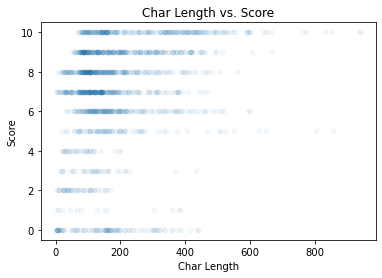

In [217]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'length', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Char Length')
ax.set_ylabel('Score')
ax.set_title('Char Length vs. Score')

In [218]:
from sklearn.model_selection import train_test_split
# your code here
X_train, X_test, y_train, y_test = train_test_split(np.array(df['length']).reshape(-1,1), df["score"], test_size=0.3, random_state=1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (1050, 1) (1050,)
test shape (450, 1) (450,)


In [219]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print  ('train score =' , train_score)
print  ('test score = {}'.format(test_score))

train score = 0.0750142588037207
test score = 0.013233546425281517


## 4. Feature Engineering
Create at least 3 different features

In [280]:
df['sentences'] = [len(sent_tokenize(answer)) for answer in df.answer]

In [281]:
df['words'] = [len(word_tokenize(answer)) for answer in df.answer]

In [282]:
liste = []

for row in df.iloc() :
    liste2 = []
    for word in word_tokenize(row['answer']) :
        if word not in stopwords.words('english') :
            liste2.append(word)
    liste.append(len(set(liste2)))

df['Filter_Uniq&Simple_words'] = liste

In [283]:
## Too long to compile 
'''from nltk.corpus import wordnet

liste=[]

def wordscheck(df,none_valid_words):
    for none_valid_words in df.none_valid_words:
        i=0
        for index in none_valid_words:
            #print(index)
            if index not in nltk.corpus.words.words():  
            #print(index)
                i = i +1
        liste.append(i)
            
        
df['none_valid_words'] = [word_tokenize(answer) for answer in df.answer ]

wordscheck(df,df['none_valid_words'])

df['nbr_invalid_words'] = liste
df.head()
#print(df['nbr_invalid_words'])
'''

"from nltk.corpus import wordnet\n\nliste=[]\n\ndef wordscheck(df,none_valid_words):\n    for none_valid_words in df.none_valid_words:\n        i=0\n        for index in none_valid_words:\n            #print(index)\n            if index not in nltk.corpus.words.words():  \n            #print(index)\n                i = i +1\n        liste.append(i)\n            \n        \ndf['none_valid_words'] = [word_tokenize(answer) for answer in df.answer ]\n\nwordscheck(df,df['none_valid_words'])\n\ndf['nbr_invalid_words'] = liste\ndf.head()\n#print(df['nbr_invalid_words'])\n"

## 5. Visualize the data
Create at least 3 graphs visualizing your features with respect to the target

Text(0.5, 1.0, 'Number of Sentences vs. Score')

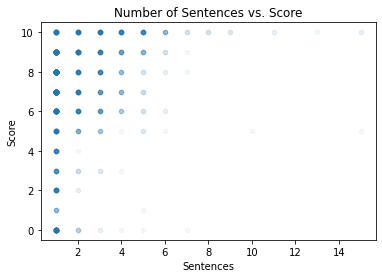

In [284]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'sentences', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Sentences')
ax.set_ylabel('Score')
ax.set_title('Number of Sentences vs. Score')

Text(0.5, 1.0, ' Number of Words vs. Score')

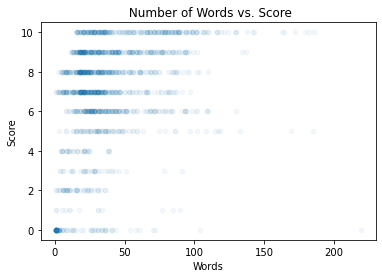

In [285]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'words', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Words')
ax.set_ylabel('Score')
ax.set_title(' Number of Words vs. Score')

Text(0.5, 1.0, 'Unique&Simple words filtered vs. Score')

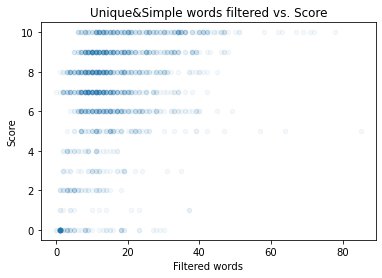

In [286]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'Filter_Uniq&Simple_words', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Filtered words')
ax.set_ylabel('Score')
ax.set_title('Unique&Simple words filtered vs. Score')

## 6. Model Training
Pick a model, fit your features and print performance metrics

In [289]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

y = df['score']
X = df.drop(columns="score")
X = X.select_dtypes(exclude='object')

params = {'min_samples_leaf':list((2,3,4)),'min_samples_split':list((1,2,3)),
          'n_estimators':list((100,110,120)),'max_depth':list((4,6,8))}

clf_rf = RandomForestClassifier(random_state=1)
clf_gs = GridSearchCV(clf_rf, params, scoring = 'accuracy',cv=5)
clf_gs.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 110, 120]},
             scoring='accuracy')

In [290]:
print(clf_gs.best_score_.round(3))
print("best parameters: ", clf_gs.best_params_)

0.371
best parameters:  {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 120}


## 7. RESULT INTERPRETATION
Look at parameters, print or visualize predictions

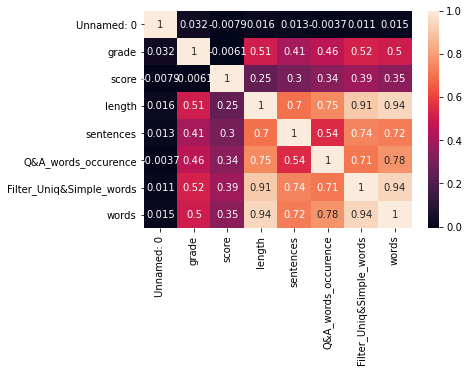

In [291]:
## CODE
import seaborn as sn
sn.heatmap(df.corr(), annot=True)
plt.show()

In [292]:
'''I think if i add the Valid/Unvalid english words detection this might be better, unfortunatly this took too much time to compile. However maybe by increasing the features with mean values this probably also increase the score.'''


'I think if i add the Valid/Unvalid english words detection this might be better, unfortunatly this took too much time to compile. However maybe by increasing the features with mean values this probably also increase the score.'

## 8. Second interation improvement


Text(0.5, 1.0, 'Words occurence Q&A vs. Score')

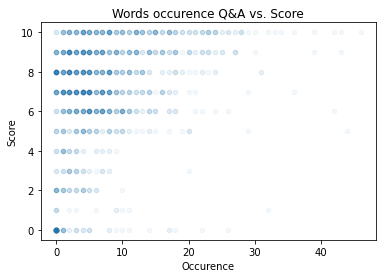

In [293]:
liste = []
a_list = df['answer'].tolist()
q_list = df['question_text'].tolist()
i = 0 

while( i < len(q_list)):
    
    answer_split = a_list[i].lower().split(" ")
    question_split = q_list[i].lower().split(" ")
    t = 0
    
    for j in answer_split:
        if j in question_split:
            #print(j)
            t = t + 1
    
    liste.append(t)
    i = i + 1        

df['Q&A_words_occurence'] = liste

fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'Q&A_words_occurence', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Occurence')
ax.set_ylabel('Score')
ax.set_title('Words occurence Q&A vs. Score')

In [295]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

y = df['score']
X = df.drop(columns="score")
X = X.select_dtypes(exclude='object')

params = {'min_samples_leaf':list((2,3,4)),'min_samples_split':list((1,2,3)),
          'n_estimators':list((120,125,127)),'max_depth':list((8,10,11))}

clf_rf = ExtraTreesClassifier(random_state=1)
clf_gs = GridSearchCV(clf_rf, params, scoring = 'accuracy',cv=5)
clf_gs.fit(X,y)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
             param_grid={'max_depth': [8, 10, 11],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [120, 125, 127]},
             scoring='accuracy')

In [296]:
print(clf_gs.best_score_.round(3))
print("best parameters: ", clf_gs.best_params_)

0.386
best parameters:  {'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 125}
